In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot3 as up3

In [2]:
variables = ["run_number", "subrun_number", "event_number", "reco_vertex_size", "reco_asso_showers", "reco_asso_tracks"]


run="run3"
mass_value = "0.05"
ratio="0.6"
decay_mode="pi0"
base_dir = "/home/lmlepin/Desktop/dm_sets/"
input_file = "{}_dt_ratio_{}_ma_{}_{}_sp.root".format(run,ratio,mass_value,decay_mode)
print("File: ", input_file)
input_tree = up3.open(base_dir + input_file)["singlephotonana"]["vertex_tree"]
df = input_tree.pandas.df(variables)

File:  run3_dt_ratio_0.6_ma_0.05_pi0_sp.root


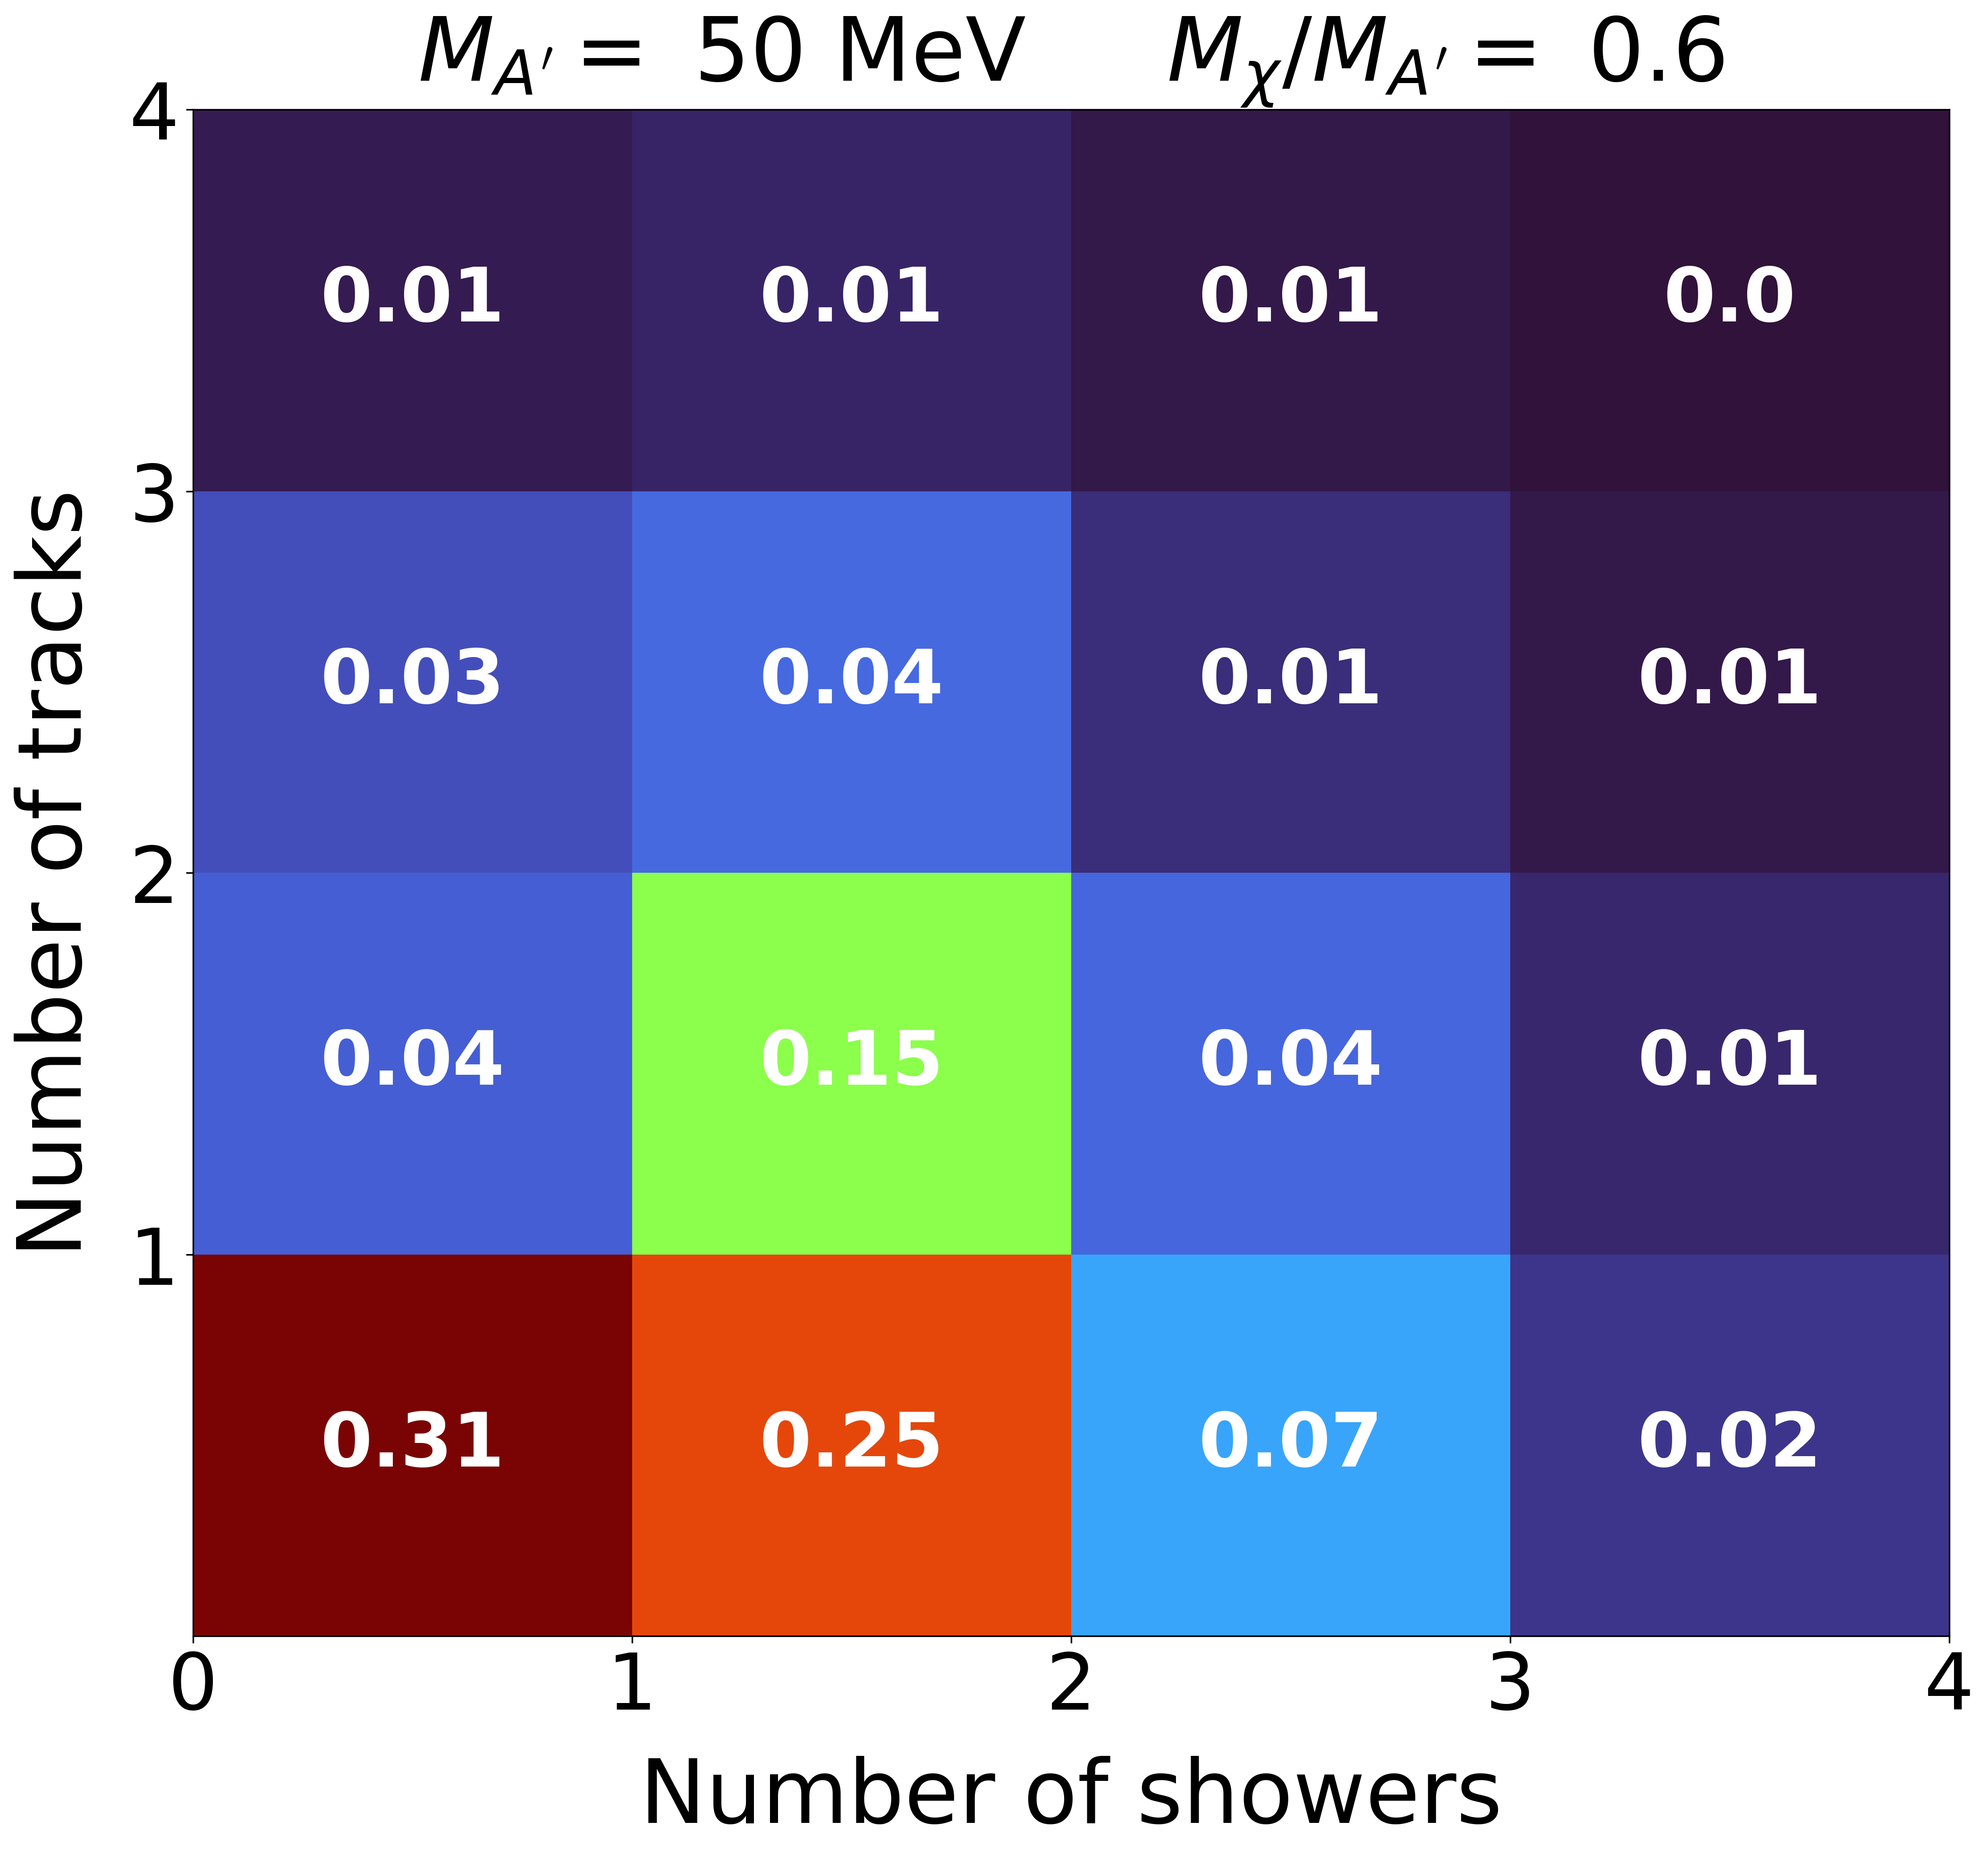

In [3]:
n_tracks = df['reco_asso_tracks']
n_showers = df['reco_asso_showers']
plt.figure(figsize=(16,14),dpi=300)
bins_2d = [0., 1., 2., 3., 4.]
hist, xbins, ybins, im = plt.hist2d(n_showers,n_tracks,bins=(bins_2d,bins_2d),cmap='turbo')

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        plt.text(xbins[j]+0.5,ybins[i]+0.5, round(int(hist.T[i,j])/(len(df)), 2) , 
                color="white", ha="center", va="center", fontweight="bold", fontsize=38)

mass_value_str = int(1000*float(mass_value))
title_label = r"$M_{A'}=$ " + str(mass_value_str) + " MeV     $M_{\chi}/M_{A'}=$ " + ratio
plt.title(title_label,size=45,pad=15)
plt.xticks([0, 1,2,3,4],size=40)
plt.yticks([1,2,3,4],size=40)
plt.xlim(0,4)
plt.ylim(0,4)
plt.xlabel('Number of showers',size=45,labelpad=15)
plt.ylabel('Number of tracks',size=45,labelpad=15)
plt.savefig("/home/lmlepin/Desktop/Plots_DT_Drive/2023/truth_plots/n_tracks_n_showers_ratio_{}_ma_{}.pdf".format(ratio,mass_value),bbox_inches='tight')
plt.savefig("/home/lmlepin/Desktop/Plots_DT_Drive/2023/truth_plots/n_tracks_n_showers_ratio_{}_ma_{}.png".format(ratio,mass_value),bbox_inches='tight')